# TEMPLATE Data Exploration of orders.csv

In [2]:
import pandas as pd

In [4]:
#url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
#url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" # orders.csv
#url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing" # brands.csv

url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

#STORE A COPY
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=to_csv
products.to_csv("products_original.csv", index=False)

## A) Check size, data-types, missing values and duplicates with .shape and .info()

In [6]:
products.shape 

(19326, 7)

In [7]:
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [9]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [15]:
products.nunique()
#or products.duplicated().sum()

sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64

In [13]:
#check if everything is alphanumeric
#order.order_id.str.isalnum() --> only works on object-type

**INFO:**
- ...

**FLAG:
___**
- ..created_date is type object --> I'd expect a date or datetime


## B) Check raw data with .head() and .tail()

In [6]:
orders.head(20)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
7,245851,2017-04-04 20:58:21,79.99,Pending
8,245941,2017-01-01 10:32:23,183.52,Completed
9,246018,2017-02-13 23:02:57,211.95,Completed


**INFO:**
- 6 digit order_id
- created_date has the format 'yyy-mm-dd hh:mm:ss'
- total_paid seperates with ',' --> looks good
- state has the following values: 'Completed', 'Cancelled', 'Pending', 'Shopping Basket', 'Place Order' and maybe more. So far it doesn't look like there are spelling mistakes in the state-column.

## C) Explore numerical columns with .hist and .describe()

array([[<AxesSubplot:title={'center':'total_paid'}>]], dtype=object)

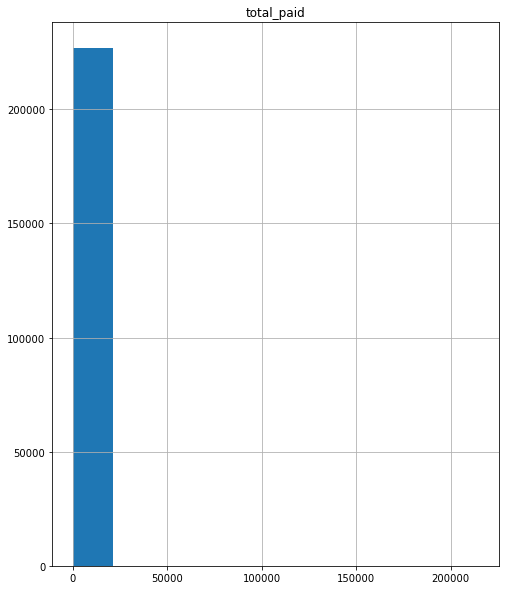

In [7]:
orders.hist('total_paid', bins = 10, figsize= (8,10))

In [8]:
orders.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


**INFO:**
- n = 226,909  --> but 226,904 on the total_paid (what about 5 missing ones?)
- mean value_paid is 112.99
- IQR of total_paid = 525.98 - 34.19 = a little below 500
- order_ids start at 241319 and go up to 527401.

**NOTE:**
- There seem to be orders with 0 money total_paid. Might have to do with status 'Shopping_Basket'

**FLAG: Very high total_paid value of > 200,000**
- There are outliers in the total_paid column: Max value is 214,747
- nlargest(5) --> still above 214,000 - different timestamps from 2017 and 2018, same state: Shopping Basket
- nlargest(20) --> down to 87,800 - different timestamps from 2017 and 2018, same state: Shopping Basket
- nlargest(50) --> down to 26,500 - dif. timest. as above, state: most have 'Shopping Basket' one order has state == 'Cancelled'
- nlargest(100) --> down to 14,900 - additional state == Place Order
- nlargest(1000) --> total_paid 5423.58 --> Duplicates!

**FLAG: Duplicate values with similar timestamp with total_paid == 5423.58**
The value  is there at least 5 times if not more and its created_date is around 2017-12-12 (and a bit before and after). It looks like someone wanted to order something and tried several times.






In [9]:
orders.nlargest(100, "total_paid")

,order_id,created_date,total_paid,state
96028,395611,2017-09-01 20:56:34,214747.53,Shopping Basket
2478,301934,2017-01-03 19:27:13,214746.63,Shopping Basket
183927,484334,2018-01-07 15:58:26,214714.31,Shopping Basket
61659,361200,2017-06-01 11:55:02,214642.47,Shopping Basket
40557,340045,2017-03-28 13:27:52,214517.58,Shopping Basket
...,...,...,...,...
163481,463768,2017-12-15 13:48:35,15505.42,Place Order
56941,356477,2017-05-17 00:00:46,15348.00,Shopping Basket
105313,404898,2017-09-26 15:25:00,15030.10,Shopping Basket
98016,397600,2017-09-07 23:49:01,14992.15,Shopping Basket


## D) Explore categorical columns with value_counts() and .plot.bar()

<AxesSubplot:>

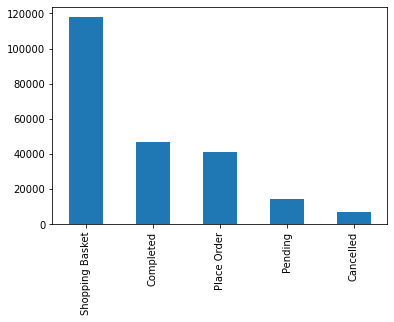

In [10]:
order_states = orders.state.value_counts()
order_states.plot.bar()

**FLAG: The majority of items is category 'Shopping Basket**
Here we'll need to find out what this means. 
- Is there a time from which on, there are no more orders 'completed' and the state did not get updated anymore?
- Can we assume all orders with state 'Shopping Basket' (which have a price) are completed? --> I do not think so


In [14]:
# I would like to see a relationship between category "Shopping Basket" and the "created_date"
# but so far it does not work.
#orders.plot.scatter(x="state", y="created_date");
